# **Proyecto 1 Etapa 1 - Analítica de textos**

#### Grupo 28

#### *Gabriel Dicelis - 201920847*

#### *Juan Pablo Martinez - 202012623*

#### *Laura Restrepo - 202013289*

## Importación de librerías y módulos

In [ ]:
!pip install contractions
!pip install langdetect
!pip install inflect
!pip install scikit-plot
!python -m spacy download es_core_news_sm

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('stopwords-es') # stopwords en español
nltk.download('wordnet')

import spacy
import pandas as pd
import numpy as np
import sys
!{sys.executable} -m pip install pandas-profiling

import re, string, unicodedata
import contractions
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

import seaborn as sns
import seaborn as sns; sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from langdetect import detect

import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=1e62134dff47114b25b938f51b03c7c455ba4951caeb21b76dce313fb683e803
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 27.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Error loading stopwords-es: Package 'stopwords-es' not
[nltk_data]     found in index
[nltk_data] Downloading package wordnet to /root/nltk_data...


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 12.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=6b5113c84789f5932f447349ab1104db186b657e7558012d52c08356d959a7bb
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


## 0. Carga de datos

In [ ]:
df_reviews = pd.read_csv('data/tipo2_entrenamiento_estudiantes.csv', sep=',', encoding = "UTF-8")

## 1. Entendimiento de los datos

### Diccionario de datos

A continuación se encuentra una breve explicación de los datos proporcionados:

| Columna | Tipo de variable | Definición |
|:--------|:--------|:--------|
| Review | No estructurado | Reseña del sitio turístico visitado. |
| Class | Categórica | Calificación según el sentimiento que tuvo el turista hacia el lugar visitado. |

### Cantidad de filas y columnas

In [ ]:
df_reviews.shape # (filas, columnas)

(7875, 2)

Hay 7875 filas de datos, separadas en dos columnas.

### Tipo de dato de cada columna

In [ ]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7875 entries, 0 to 7874
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  7875 non-null   object
 1   Class   7875 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 123.2+ KB


El tipo de dato de cada variable es consistente con su definición. _Review_ es de tipo object (string), y _Class_ un entero.

### Muestra de los datos

In [ ]:
# Muestra de 10 datos
df_reviews.sample(10)

,Review,Class
3615,"La atención es pésima, tienen un buen menú per...",1
6678,teniamos 6 años sin venir y fue lamentable hab...,2
5001,El lugar es agradable. Moderno y con gran clie...,4
1953,"Habitaciones cómodas y limpias, con muchas atr...",4
2513,Plaza típica en el centro de la ciudad. Puede ...,4
2196,Hermoso MalecónVale la pena recorrerlo Se cono...,2
1001,Impresionante gran significado cultural arcite...,4
5328,Si ni siquiera remotamente cerca de estas mara...,5
2438,3 cervezas a las 3 de la tarde de un día sábad...,1
3238,"muy bien ubicado y con un excelente servicio, ...",5


### Exploración de variables

Para la variable _Review_, se exploran varios factores.

**Promedio de caracteres por reseña:**

In [ ]:
promedio_caracteres = df_reviews['Review'].str.len().mean()
print("Promedio de caracteres:", promedio_caracteres)


Promedio de caracteres: 408.0504126984127


**Promedio de cantidad de palabras por reseña:**

In [ ]:
promedio_palabras = df_reviews['Review'].apply(lambda x: len(x.split())).mean()
print("Promedio de cantidad de palabras:", promedio_palabras)

Promedio de cantidad de palabras: 70.8167619047619


**Idiomas:**

In [ ]:
# Función para detectar el idioma de una reseña
def detectar_idioma(texto):
    try:
        idioma = detect(texto)
        return idioma
    except:
        return 'Desconocido'  # Manejar casos en los que no se puede detectar el idioma

# Aplicar la función a la columna de reseñas y crear una nueva columna con el idioma detectado
df_reviews['Idioma'] = df_reviews['Review'].apply(detectar_idioma)

# Calcular el porcentaje de idioma
porcentaje_idioma = df_reviews['Idioma'].value_counts(normalize=True) * 100

porcentaje_idioma

Idioma
es    99.911111
pt     0.025397
en     0.025397
it     0.025397
sq     0.012698
Name: proportion, dtype: float64

Podemos ver que la mayoría de reseñas son en español, y que hay algunas en inglés, portgués, italiano y albanés. El porcentaje de estos idiomas es extremadamente bajo, por lo que se toma la decisión de borrar estas filas (esto se hará en la limpieza de datos).

Para la variable _Class_ se observa simplemente la cantidad.

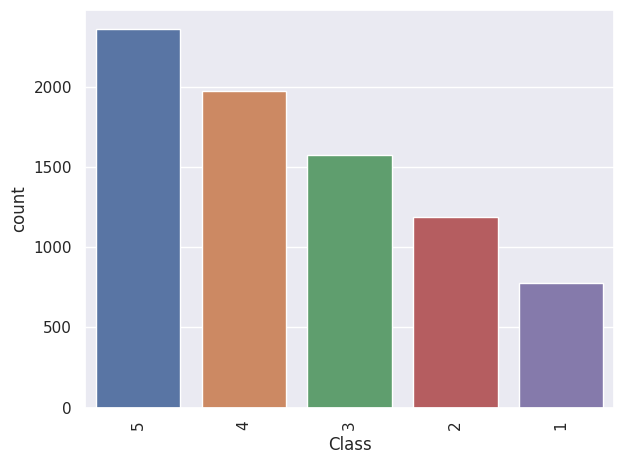

In [ ]:
# Ordenar
order = df_reviews['Class'].value_counts(ascending=False).index

# Crear el gráfico
ax = sns.countplot(x='Class', data=df_reviews, order=order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tight_layout()

No se observa ningún valor fuera del rango, de valor continuo, nulo, o de otro tipo de dato.

## 2. Verificación de la calidad de los datos

### Completitud

In [ ]:
# Cálculo de porcentaje de valores nulos por columna
((df_reviews.isnull().sum()/df_reviews.shape[0])).sort_values(ascending=False)

Review    0.0
Class     0.0
Idioma    0.0
dtype: float64

No hay datos nulos.

### Unicidad

Se verifica que no haya datos duplicados.

In [ ]:
df_reviews.duplicated(keep = False).sum()

102

Como se puede ver, hay 102 datos duplicados, los cuales serán manejados en el apartado de limpieza.

### Consistencia

Se salta esta verificación, pues según la información proporcionada no hay variables que deban ser consistentes entre sí.

### Validez

Se verifica que la variable _Class_ tiene valores de 1 a 5, enteros.

In [ ]:
df_reviews['Class'].unique()

array([5, 3, 4, 2, 1])

No hay valores atípicos. Bien.

## 3. Preparación de los datos

In [142]:
# Se crea una copia del dataframe para iniciar la limpieza de los datos
df_limpio = df_reviews.copy()

### 3.1 Limpieza de los datos

#### Eliminación de filas duplicadas

In [143]:
df_limpio = df_limpio.drop_duplicates()

Se verifica que no hayan quedado datos duplicados.

In [144]:
df_limpio.duplicated(keep = False).sum()

0

#### Eliminación de filas en otros idiomas

Se eliminan las filas con idiomas diferentes a español.

In [145]:
# Índices de las filas a eliminar
indices_a_eliminar = df_limpio.loc[df_limpio['Idioma'] != 'es'].index

# Eliminar las filas seleccionadas
df_limpio = df_limpio.drop(indices_a_eliminar)

#### Preprocessing

In [146]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        if word is not None:
          new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
          new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    return [word.lower() for word in words]

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        if word is not None:
            new_word = re.sub(r'[^\w\s]', '', word)
            if new_word != '':
                new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

# Ejemplo de replace_numbers
words = "Tengo 21 años"
print(replace_numbers(words.split()))

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    palabras_vacias = set(stopwords.words('spanish'))
    return [word for word in words if word.lower() not in palabras_vacias]

def preprocessing(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = replace_numbers(words)
    words = remove_stopwords(words)
    return words


['Tengo', 'twenty-one', 'años']


El output anterior es de una prueba de un ejemplo de replace_numbers. Como se puede ver, la representación textual queda en inglés. Sin embargo, esto no es un problema, pues anteriormente se aseguró que solo quedaran las filas en español y solo los números estarán en inglés.

### 3.2 Tokenización

Primero se realiza una corrección de las contracciones que pueden estar presentes en los textos.

In [147]:
df_limpio['Review'] = df_limpio['Review'].apply(contractions.fix) # Aplica la corrección de las contracciones

Luego se tokenizan las palabras, destinando una columna para el resultado

In [148]:
# Se agrega una columna de palabras
df_limpio['Palabras'] = df_limpio['Review'].apply(word_tokenize)

In [149]:
df_limpio['Palabras'].dropna()

0       [Muy, buena, atención, y, aclaración, de, duda...
1       [Buen, hotel, si, están, obligados, a, estar, ...
2       [Es, un, lugar, muy, lindo, para, fotografías,...
3       [Abusados, con, la, factura, de, alimentos, si...
4       [Tuvimos, un, par, de, personas, en, el, grupo...
                              ...                        
7870    [Me, parece, buen, sistema, ,, agiliza, el, tr...
7871    [Fue, una, escapada, de, un, día, desde, el, c...
7872    [La, Plaza, de, la, Revolución, es, un, lugar,...
7873    [Es, la, segunda, ocasión, que, me, quedo, en,...
7874    [Llegamos, por, casualidad, a, Los, Mercaderes...
Name: Palabras, Length: 7795, dtype: object

In [150]:
df_limpio['Palabras'] = df_limpio['Palabras'].apply(preprocessing)

El dataframe limpio queda de la siguiente manera:

In [151]:
df_limpio

,Review,Class,Idioma,Palabras
0,Muy buena atención y aclaración de dudas por p...,5,es,"[buena, atencion, aclaracion, dudas, parte, se..."
1,Buen hotel si están obligados a estar cerca de...,3,es,"[buen, hotel, si, estan, obligados, cerca, cen..."
2,"Es un lugar muy lindo para fotografías, visite...",5,es,"[lugar, lindo, fotografias, visiten, selina, m..."
3,Abusados con la factura de alimentos siempre s...,3,es,"[abusados, factura, alimentos, siempre, echan,..."
4,Tuvimos un par de personas en el grupo que rea...,3,es,"[par, personas, grupo, realmente, queriamos, c..."
...,...,...,...,...
7870,"Me parece buen sistema, agiliza el transporte,...",4,es,"[parece, buen, sistema, agiliza, transporte, c..."
7871,"Fue una escapada de un día desde el complejo, ...",4,es,"[escapada, dia, complejo, grupo, turistas, hab..."
7872,La Plaza de la Revolución es un lugar emblemát...,3,es,"[plaza, revolucion, lugar, emblematico, identi..."
7873,Es la segunda ocasión que me quedo en los cuar...,1,es,"[segunda, ocasion, quedo, cuartos, area, jardi..."


Se observa que se eliminan alrededor de 0.01% de las filas del dataframe original, lo que representa un valor insignificante.

### 3.3 Normalización

Se usa el modelo de español de la libreria Spacy para aplicar lematización a las reseñas. Al reemplazar la forma flexionada de las palabras por sus lemas correspondientes, los modelos deberán identificar las palabras más relevantes que determinan el sentimiento de las reseñas entre un vocabulario mucho más reducido.

In [152]:
# Se carga el modelo de español de Spacy
nlp_spacy_es = spacy.load("es_core_news_sm")

words_act = df_limpio['Palabras'].tolist()
words_lemma = []

for i in range(len(words_act)):
  doc_es = nlp_spacy_es(" ".join(words_act[i]))
  doc_process = [lemma for lemma in [token.lemma_ for token in doc_es]]
  words_lemma.append(doc_process)

In [153]:
# Se crea una nueva columna con las reseñas lematizadas
words_lemma = [" ".join(review) for review in words_lemma]
df_limpio['Lemma'] = words_lemma
df_limpio

,Review,Class,Idioma,Palabras,Lemma
0,Muy buena atención y aclaración de dudas por p...,5,es,"[buena, atencion, aclaracion, dudas, parte, se...",buen atencion aclaracion duda parte senorito v...
1,Buen hotel si están obligados a estar cerca de...,3,es,"[buen, hotel, si, estan, obligados, cerca, cen...",buen hotel si estar obligado cerca centro conv...
2,"Es un lugar muy lindo para fotografías, visite...",5,es,"[lugar, lindo, fotografias, visiten, selina, m...",lugar lindo fotografias visitir selina musico ...
3,Abusados con la factura de alimentos siempre s...,3,es,"[abusados, factura, alimentos, siempre, echan,...",abusado factura alimento siempre echar culpa i...
4,Tuvimos un par de personas en el grupo que rea...,3,es,"[par, personas, grupo, realmente, queriamos, c...",par persona grupo realmente querer comer cabri...
...,...,...,...,...,...
7870,"Me parece buen sistema, agiliza el transporte,...",4,es,"[parece, buen, sistema, agiliza, transporte, c...",parecer buen sistema agilizar transporte conec...
7871,"Fue una escapada de un día desde el complejo, ...",4,es,"[escapada, dia, complejo, grupo, turistas, hab...",escapar dia complejo grupo turista habiar guia...
7872,La Plaza de la Revolución es un lugar emblemát...,3,es,"[plaza, revolucion, lugar, emblematico, identi...",plaza revolucion lugar emblematico identifico ...
7873,Es la segunda ocasión que me quedo en los cuar...,1,es,"[segunda, ocasion, quedo, cuartos, area, jardi...",segundo ocasion quedo cuartos areo jardin como...


Se crea un archivo csv con el conjunto de datos limpio y preprado.

In [154]:
df_limpio.to_csv('data/datos_limpios_y_preparados.csv', index=False)

### 3.4 Selección de campos

Se seleccionará la columna de las reseñas lematizadas para la clasificación y se usará una representación Tf-idf para tener en cuenta la relevancia de las palabras que aparecen por etiqueta.

In [155]:
# Instanciando la clase que usará la representación Tf-idf
tf_idf = TfidfVectorizer()

# Transformando las reseñas a la representación Tf-idf
X = tf_idf.fit_transform(words_lemma)
y = df_limpio['Class'].values

# Separando el conjunto de datos entre entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Modelado

### Algoritmo 1 (Naive Bayes) - Gabriel Dicelis

In [ ]:
# Defining the Naive Bayes models for each representation
nb_model = MultinomialNB()

In [ ]:
# Training both models
nb_model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# Make predictions on the test set
nb_y_pred = nb_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, nb_y_pred)

# Calculate precision
precision = precision_score(y_test, nb_y_pred, average='weighted')

# Calculate recall
recall = recall_score(y_test, nb_y_pred, average='weighted')

# Calculate F1 score
f1 = f1_score(y_test, nb_y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.39448364336112896
Precision: 0.4364305367639419
Recall: 0.39448364336112896
F1 Score: 0.3276860600575905


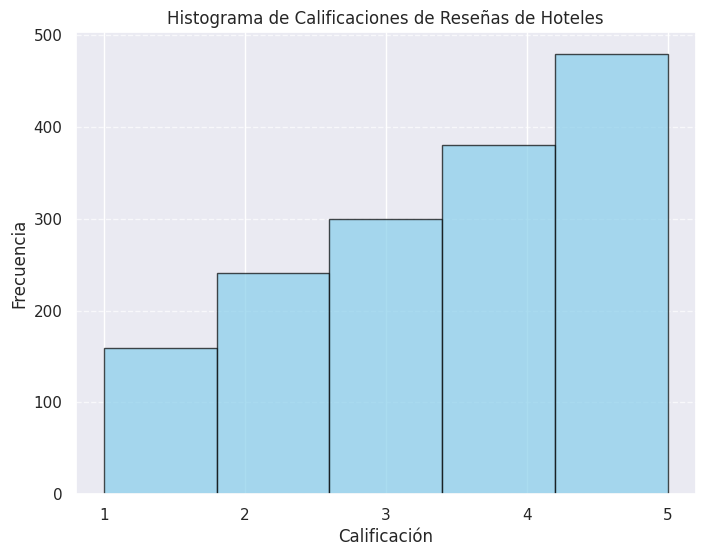

In [ ]:
# Crear el histograma de las calificaciones
plt.figure(figsize=(8, 6))
plt.hist(y_test, bins=5, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.title('Histograma de Calificaciones de Reseñas de Hoteles')
plt.xticks(range(1, 6))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

A partir del modelo de Naive Bayes se puede visualizar la importancia de las palabras en cuanto a las reseñas, esto se realiza mediante una función de que calcula las probabilidades logaritmicas de las palabras, luego se procede a calcular la importancia relativa como la diferencia entre el maximo y minimo de las probabilidades logaritmicas, se usa una gráfica de barras para representar las 10 palabras mas importantes.


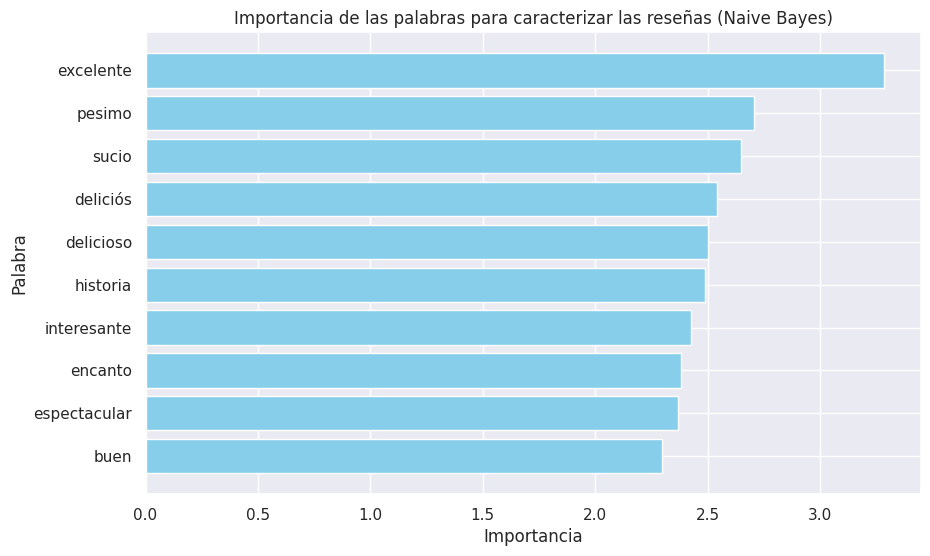

In [ ]:
features = tf_idf.get_feature_names_out()

# Obtener las probabilidades logarítmicas de las palabras
log_probabilities = nb_model.feature_log_prob_

# Calcular la importancia relativa de las palabras (la diferencia entre las probabilidades máxima y mínima)
feature_importance = log_probabilities.max(axis=0) - log_probabilities.min(axis=0)

# Obtener los índices de las 10 palabras más importantes
word_indices = np.argsort(feature_importance)[-10:]

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(word_indices)), feature_importance[word_indices], color='skyblue')
plt.yticks(np.arange(len(word_indices)), [features[i] for i in word_indices])
plt.xlabel('Importancia')
plt.ylabel('Palabra')
plt.title('Importancia de las palabras para caracterizar las reseñas (Naive Bayes)')
plt.show()

Para cumplir con los objetivos del negocio se crea una segunda iteración del modelo pero retirando los adjetivos, con el objetivo de explorar conceptos diferenciadores dentro de las reseñas

In [ ]:
df_nb = df_limpio.copy()

# Cargar el modelo de lenguaje en español de Spacy
nlp_spacy_es = spacy.load("es_core_news_sm")

# Función para eliminar los adjetivos de una reseña lematizada
def remove_adjectives(text):
    doc = nlp_spacy_es(text)
    lemmas_sin_adjetivos = [token.lemma_ for token in doc if token.pos_ != "ADJ"]
    return " ".join(lemmas_sin_adjetivos)

# Aplicar la función a la columna "Lemma" y crear una nueva columna "Lemma_sin_adjetivos"
df_nb['Lemma_sin_adjetivos'] = df_nb['Lemma'].apply(remove_adjectives)

In [ ]:
df_nb

,Review,Class,Idioma,Palabras,Lemma,Lemma_sin_adjetivos
0,Muy buena atención y aclaración de dudas por p...,5,es,"[buena, atencion, aclaracion, dudas, parte, se...",buen atencion aclaracion duda parte senorito v...,atencion aclaracion dudar parte castillo atent...
1,Buen hotel si están obligados a estar cerca de...,3,es,"[buen, hotel, si, estan, obligados, cerca, cen...",buen hotel si estar obligado cerca centro conv...,hotel si estar cerca centro convención necesit...
2,"Es un lugar muy lindo para fotografías, visite...",5,es,"[lugar, lindo, fotografias, visiten, selina, m...",lugar lindo fotografias visitir selina musico ...,lugar fotografias visitir selina cerveza comida
3,Abusados con la factura de alimentos siempre s...,3,es,"[abusados, factura, alimentos, siempre, echan,...",abusado factura alimento siempre echar culpa i...,factura alimento siempre echar culpa ir buscar...
4,Tuvimos un par de personas en el grupo que rea...,3,es,"[par, personas, grupo, realmente, queriamos, c...",par persona grupo realmente querer comer cabri...,par grupo realmente querer comer cabrito resto...
...,...,...,...,...,...,...
7870,"Me parece buen sistema, agiliza el transporte,...",4,es,"[parece, buen, sistema, agiliza, transporte, c...",parecer buen sistema agilizar transporte conec...,parecer sistema agilizar transporte conecta me...
7871,"Fue una escapada de un día desde el complejo, ...",4,es,"[escapada, dia, complejo, grupo, turistas, hab...",escapar dia complejo grupo turista habiar guia...,escapar dia grupo habiar guia vez visitar tipo...
7872,La Plaza de la Revolución es un lugar emblemát...,3,es,"[plaza, revolucion, lugar, emblematico, identi...",plaza revolucion lugar emblematico identifico ...,plaza revolucion lugar habán partir mitad sigl...
7873,Es la segunda ocasión que me quedo en los cuar...,1,es,"[segunda, ocasion, quedo, cuartos, area, jardi...",segundo ocasion quedo cuartos areo jardin como...,ocasion quedo cuartos areir comodo menos inter...


Despues de eliminar los adjetivos de vuelve a entrenar el modelo de Naive Bayes

In [ ]:
# Instanciando la clase que usará la representación Tf-idf
tf_idf = TfidfVectorizer()

# Transformando las reseñas a la representación Tf-idf
Xnb2 = tf_idf.fit_transform(df_nb['Lemma_sin_adjetivos'])
ynb2 = df_nb['Class'].values

# Separando el conjunto de datos entre entrenamiento y test
Xnb_train, Xnb_test, ynb_train, ynb_test = train_test_split(Xnb2, ynb2, test_size=0.2, random_state=0)

# Defining the Naive Bayes models for each representation
nb_model2 = MultinomialNB()

# Training both models
nb_model2.fit(Xnb_train, ynb_train)

# Make predictions on the test set
nb_y_pred = nb_model2.predict(Xnb_test)

# Calculate accuracy
accuracy = accuracy_score(ynb_test, nb_y_pred)

# Calculate precision
precision = precision_score(ynb_test, nb_y_pred, average='weighted')

# Calculate recall
recall = recall_score(ynb_test, nb_y_pred, average='weighted')

# Calculate F1 score
f1 = f1_score(ynb_test, nb_y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.37716484926234767
Precision: 0.43702406700561236
Recall: 0.37716484926234767
F1 Score: 0.3138138006882168


Como se puede observar, la presición del modelo ha bajado ya que los adjetivos son bastante representativos para las calificaciones.

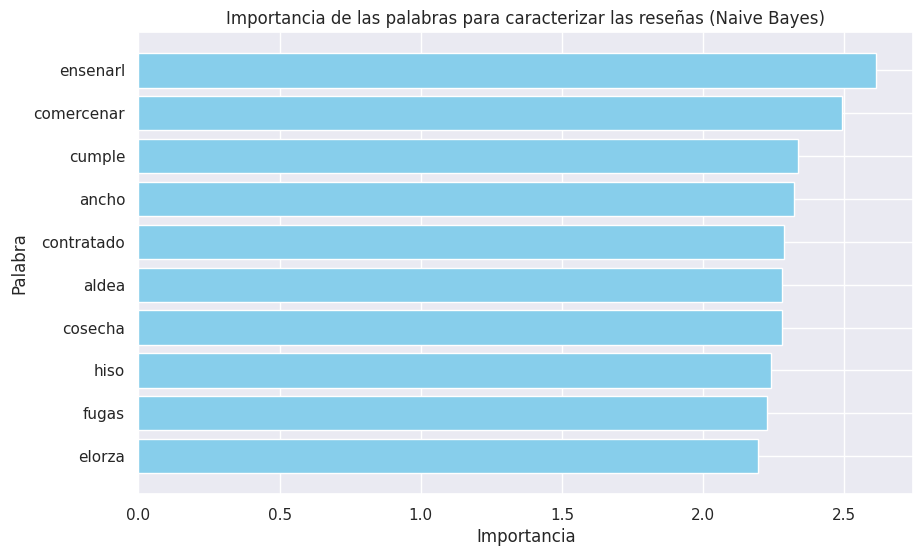

In [ ]:
# Obtener las probabilidades logarítmicas de las palabras
log_probabilities = nb_model2.feature_log_prob_

# Calcular la importancia relativa de las palabras (la diferencia entre las probabilidades máxima y mínima)
feature_importance = log_probabilities.max(axis=0) - log_probabilities.min(axis=0)

# Obtener los índices de las 10 palabras más importantes
word_indices = np.argsort(feature_importance)[-10:]

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(word_indices)), feature_importance[word_indices], color='skyblue')
plt.yticks(np.arange(len(word_indices)), [features[i] for i in word_indices])
plt.xlabel('Importancia')
plt.ylabel('Palabra')
plt.title('Importancia de las palabras para caracterizar las reseñas (Naive Bayes)')
plt.show()

### Algoritmo 2 (Regresión Logística) - Juan Pablo Martínez

In [ ]:
# Creando el modelo
lr_model = SGDClassifier(loss='log_loss', learning_rate='optimal', eta0=0.05)

In [ ]:
# Entrenando el modelo
lr_model.fit(X_train, y_train)

SGDClassifier(eta0=0.05, loss='log_loss')

In [ ]:
# Make predictions on the test set
lr_y_pred = lr_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, lr_y_pred)

# Calculate precision
precision = precision_score(y_test, lr_y_pred, average='weighted')

# Calculate recall
recall = recall_score(y_test, lr_y_pred, average='weighted')

# Calculate F1 score
f1 = f1_score(y_test, lr_y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.47851186658114175
Precision: 0.4780629074139031
Recall: 0.47851186658114175
F1 Score: 0.4685905767359992


### Algoritmo 3 (SVM) - Laura Restrepo

SVM es un algoritmo usado para tareas de clasificación que permite separar datos en distintos grupos, útil para identificar caracterísitcas comunes o diferenciadoras dentro de los textos.

#### Iteración 1

En esta primera iteración se creará un modelo sencillo para evaluar las métricas y resultados iniciales.

In [156]:
# Crear el modelo SVM
svm_model = SVC(kernel='linear', random_state=42)

In [157]:
# Entrenar el modelo
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [158]:
# Hacer predicciones en el conjunto de prueba
svm_y_pred = svm_model.predict(X_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, svm_y_pred)
precision = precision_score(y_test, svm_y_pred, average='weighted')
recall = recall_score(y_test, svm_y_pred, average='weighted')
f1 = f1_score(y_test, svm_y_pred, average='weighted')

# Imprimir métricas de evaluación
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.4836433611289288
Precision: 0.4858411890321926
Recall: 0.4836433611289288
F1 Score: 0.48091387471624214


Las métricas obtenidas permite tener un modelo muestran un rendimiento moderado.

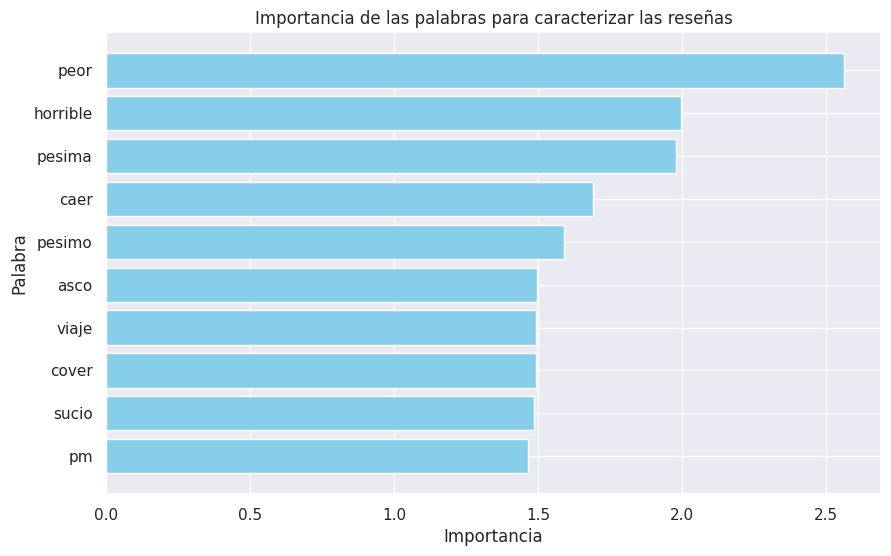

In [159]:
features = tf_idf.get_feature_names_out()

# Obtener las características más importantes identificadas por SVM
important_features = svm_model.coef_[0]

# Convertir la matriz dispersa a un array NumPy y luego aplanar
if hasattr(important_features, 'toarray'):
    important_features = important_features.toarray()
    important_features = important_features.ravel()

# Obtener los índices de las 10 características más importantes
word_indices = np.argsort(important_features)[-10:]
word_importance = important_features[word_indices]

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(word_indices)), word_importance, color='skyblue')
plt.yticks(np.arange(len(word_indices)), [features[i] for i in word_indices])
plt.xlabel('Importancia')
plt.ylabel('Palabra')
plt.title('Importancia de las palabras para caracterizar las reseñas')
plt.show()

#### Iteración 2

En esta segunda iteración se explora el uso de hiperparámetros para mejorar las métricas.

In [110]:
df_svm2 = df_limpio.copy()

In [111]:
# Cargar el modelo de lenguaje en español de Spacy
nlp_spacy_es = spacy.load("es_core_news_sm")

# Función para eliminar los adjetivos de una reseña lematizada
def remove_adjectives(text):
    doc = nlp_spacy_es(text)
    lemmas_sin_adjetivos = [token.lemma_ for token in doc if token.pos_ != "ADJ"]
    return " ".join(lemmas_sin_adjetivos)

# Aplicar la función a la columna "Lemma" y crear una nueva columna "Lemma_sin_adjetivos"
df_svm2['Lemma_sin_adjetivos'] = df_svm2['Lemma'].apply(remove_adjectives)

In [112]:
# Transformando las reseñas a la representación Tf-idf
X = tf_idf.fit_transform(df_svm2['Lemma_sin_adjetivos'])
y = df_svm2['Class'].values

# Separando el conjunto de datos entre entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [113]:
# Crear el modelo SVM
svm_model2 = SVC(kernel='linear', random_state=42)
# Entrenar el modelo
svm_model2.fit(X_train, y_train)
# Hacer predicciones en el conjunto de prueba
svm_y_pred2= svm_model2.predict(X_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, svm_y_pred2)
precision = precision_score(y_test, svm_y_pred2, average='weighted')
recall = recall_score(y_test, svm_y_pred2, average='weighted')
f1 = f1_score(y_test, svm_y_pred2, average='weighted')

# Imprimir métricas de evaluación
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.4239897370109044
Precision: 0.4200647718820254
Recall: 0.4239897370109044
F1 Score: 0.41675729533210304


Estas métricas se analizarán posteriormente.

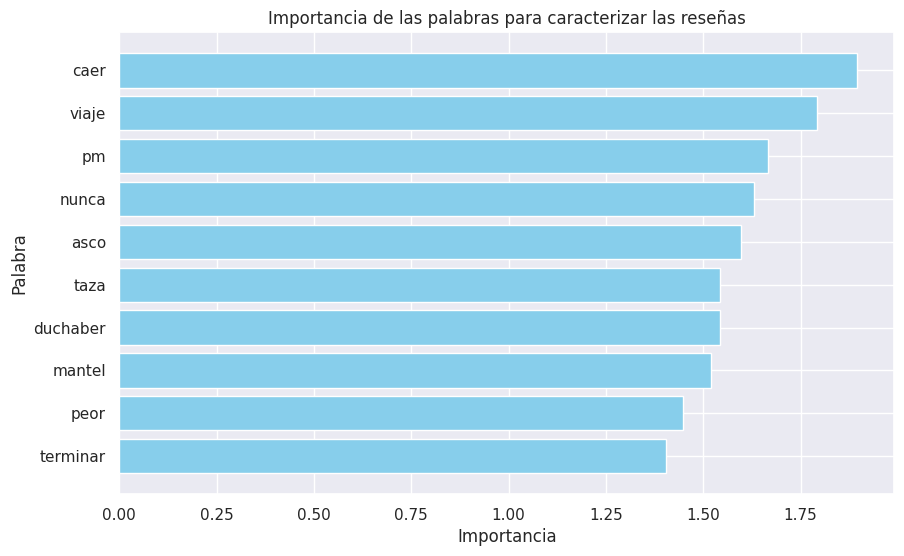

In [114]:
features = tf_idf.get_feature_names_out()

# Obtener las características más importantes identificadas por SVM
important_features = svm_model2.coef_[0]

# Convertir la matriz dispersa a un array NumPy y luego aplanar
if hasattr(important_features, 'toarray'):
    important_features = important_features.toarray()
    important_features = important_features.ravel()

# Obtener los índices de las 10 características más importantes
word_indices = np.argsort(important_features)[-10:]
word_importance = important_features[word_indices]

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(word_indices)), word_importance, color='skyblue')
plt.yticks(np.arange(len(word_indices)), [features[i] for i in word_indices])
plt.xlabel('Importancia')
plt.ylabel('Palabra')
plt.title('Importancia de las palabras para caracterizar las reseñas')
plt.show()

A pesar de que se obtienen métricas un poco más bajas, se puede observar que las palabras tienen más sentido para los objetivos del neogocio.

## Algoritmo seleccionado

El algoritmo seleccionado es SVM, pues es el que mejor f1 score tuvo.

A partir de ese modelo vamos a predecir la calificación de unas nuevas reseñas. Para ello, se cargarán los datos y se prepararán.

In [160]:
# Leer los datos de prueba
df_reviews2 = pd.read_csv('data/particion_prueba_estudiantes.csv', sep=',', encoding="UTF-8")

# Aplicar corrección de contracciones
df_reviews2['Review'] = df_reviews2['Review'].apply(contractions.fix)

# Tokenización y preprocesamiento
nlp_spacy_es = spacy.load("es_core_news_sm")
df_reviews2['Palabras'] = df_reviews2['Review'].apply(word_tokenize)

# Lematización
words_act = df_reviews2['Palabras'].tolist()
words_lemma = []

for i in range(len(words_act)):
    doc_es = nlp_spacy_es(" ".join(words_act[i]))
    doc_process = [lemma for lemma in [token.lemma_ for token in doc_es]]
    words_lemma.append(doc_process)

# Crear una nueva columna con las reseñas lematizadas
words_lemma = [" ".join(review) for review in words_lemma]
df_reviews2['Lemma'] = words_lemma

# Cargar el vectorizador TF-IDF previamente entrenado
tfidf_vectorizer = TfidfVectorizer()

X_train = tfidf_vectorizer.fit_transform(df_limpio['Lemma'])

# Preparar los datos de prueba
X_test = tfidf_vectorizer.transform(df_reviews2['Lemma'])

# Predecir la clasificación
predictions = svm_model.predict(X_test)

# Agregar la columna de clasificación predicha al DataFrame
df_reviews2['Class'] = predictions

# Mostrar las predicciones
print("Predicciones:")
print(df_reviews2[['Review', 'Class']])

Predicciones:
                                                 Review  Class
0     La primera noche nos encontramos en la habitac...      1
1     A una calle de catedral con platillos tradicio...      4
2     Porciones muy miserables\nAgua con sabor a clo...      2
3     Cartagena encanta. De todas las ciudades colon...      4
4     Ibamos con mucha ilusion de disfrutar el espec...      3
...                                                 ...    ...
1745  Subir en funicular y bajar en teleferico fue u...      4
1746  La gente espera el lugar central en La Habana,...      2
1747  Todo excelente con el hotel: las albercas para...      5
1748  Nos detuvimos en un bocado antes de la puesta ...      3
1749  NO TENIA AGUA, el mantenimiento un desastre ( ...      2

[1750 rows x 2 columns]


In [162]:
df_reviews2.to_csv('data/particion_prueba_estudiantes_predicted.csv', index=False)